## Notebook 2: Análise de Ratings e Quantidade por Ano

### Carregamento dos Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

INPUT_DATA_PATH = './datas/'
OUTPUT_PATH = './outputs/'

In [2]:
# Carregamento dos dados
df_animes = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'animes.csv'))
df_ratings = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'ratings.csv'))

print(f"Animes: {df_animes.shape}")
print(f"Ratings: {df_ratings.shape}")

Animes: (20237, 13)
Ratings: (148170496, 3)


### Transformação: Merge e Limpeza de Dados

In [3]:
# Amostragem dos ratings para análise (devido ao tamanho do dataset)
df_ratings_sample = df_ratings.sample(n=1000000, random_state=42)

# Merge entre animes e ratings
df_merged = pd.merge(df_ratings_sample, df_animes[['animeID', 'year']], on='animeID', how='inner')

# Remover anos inválidos
df_merged = df_merged[df_merged['year'].notna()]
# df_merged['year'] = pd.to_numeric(df_merged['year'], errors='coerce')
df_merged = df_merged[(df_merged['year'] >= 1960) & (df_merged['year'] <= 2024)]

print(f"Dados após merge e limpeza: {df_merged.shape}")
df_merged.head()

Dados após merge e limpeza: (998662, 4)


,userID,animeID,rating,year
0,1179251,2707,9,2019.0
1,687020,50,7,1993.0
2,215123,2745,10,2019.0
3,58391,88,7,2014.0
4,815558,4458,8,2020.0


### Análise 2: Média de Ratings e Quantidade de Avaliações por Ano (Group By)

In [4]:
# Agrupamento por ano com duas métricas
ratings_por_ano = df_merged.groupby('year')['rating'].agg(['mean', 'count']).reset_index()
ratings_por_ano.columns = ['year', 'rating_medio', 'total_avaliacoes']

# Filtrar anos com pelo menos 100 avaliações
ratings_por_ano = ratings_por_ano[ratings_por_ano['total_avaliacoes'] >= 100]

print(ratings_por_ano.head(10))
print(f"\nTotal de anos analisados: {len(ratings_por_ano)}")

      year  rating_medio  total_avaliacoes
13  1973.0      6.866142               127
18  1978.0      7.390411               146
19  1979.0      7.840741               540
20  1980.0      7.516746               418
21  1981.0      7.071795               390
22  1982.0      7.039437               355
23  1983.0      7.094395               339
24  1984.0      7.792913               903
25  1985.0      7.080764               681
26  1986.0      7.672063              2409

Total de anos analisados: 48


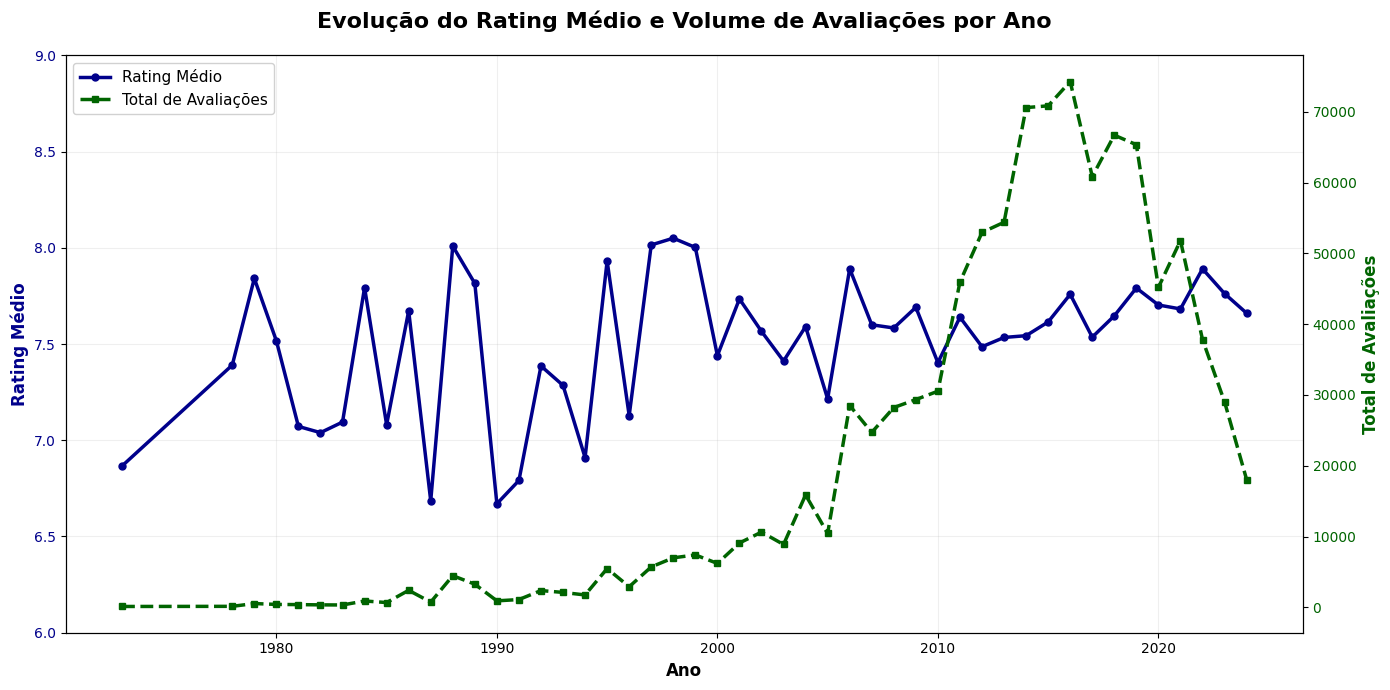

In [5]:
# Visualização com duas séries em Y (eixos diferentes)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Primeira série: Rating médio (eixo Y esquerdo)
color1 = 'darkblue'
ax1.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax1.set_ylabel('Rating Médio', color=color1, fontsize=12, fontweight='bold')
line1 = ax1.plot(ratings_por_ano['year'], ratings_por_ano['rating_medio'], 
                 marker='o', linewidth=2.5, markersize=5, color=color1, label='Rating Médio')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(6, 9)
ax1.grid(True, alpha=0.2)

# Segunda série: Total de avaliações (eixo Y direito)
ax2 = ax1.twinx()
color2 = 'darkgreen'
ax2.set_ylabel('Total de Avaliações', color=color2, fontsize=12, fontweight='bold')
line2 = ax2.plot(ratings_por_ano['year'], ratings_por_ano['total_avaliacoes'], 
                 marker='s', linewidth=2.5, markersize=5, color=color2, 
                 linestyle='--', label='Total de Avaliações')
ax2.tick_params(axis='y', labelcolor=color2)

# Título e legenda combinada
plt.title('Evolução do Rating Médio e Volume de Avaliações por Ano', 
          fontsize=16, fontweight='bold', pad=20)

# Combinar legendas das duas séries
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11, framealpha=0.9)

fig.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'nb2_ratings_por_ano_dual.png'), dpi=300, bbox_inches='tight')
plt.show()

#### Explicação do Gráfico

Este gráfico é especialmente interessante porque consegue mostrar **duas histórias ao mesmo tempo**: a qualidade dos animes e o quanto as pessoas se engajaram em avaliá-los ao longo dos anos.

**A linha azul (Rating Médio)** nos conta que a percepção de qualidade se manteve bem consistente entre 7 e 8 ao longo das décadas. É curioso ver que os animes mais antigos (1960-1980) têm notas um pouco mais altas - provavelmente porque só os clássicos que realmente marcaram época ainda são lembrados e avaliados hoje em dia.

**A linha verde (Total de Avaliações)** revela algo fascinante: houve uma explosão no número de avaliações a partir dos anos 2000! A internet e plataformas como MyAnimeList democratizaram completamente o acesso, permitindo que milhões de fãs compartilhassem suas opiniões.

O mais legal desse gráfico? **Mesmo com todo esse crescimento e popularização, a qualidade média não despencou**. Isso mostra que a indústria de anime conseguiu crescer e se expandir sem comprometer seus padrões. É como se o anime tivesse saído do nicho para o mainstream mantendo sua essência.

A correlação entre essas duas métricas nos dá uma visão completa: não importa se poucos ou muitos estão assistindo, bons animes continuam sendo bons animes!